In [22]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('database/student_performance_cleaned.csv') 

RQ1: Multivariate Analysis - Engagement vs Demographics



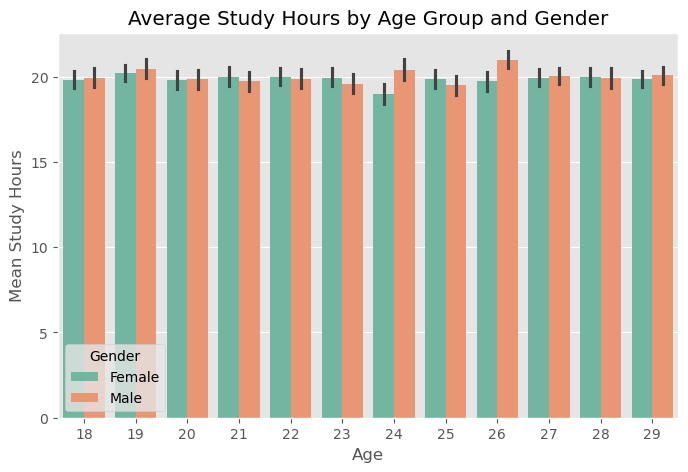

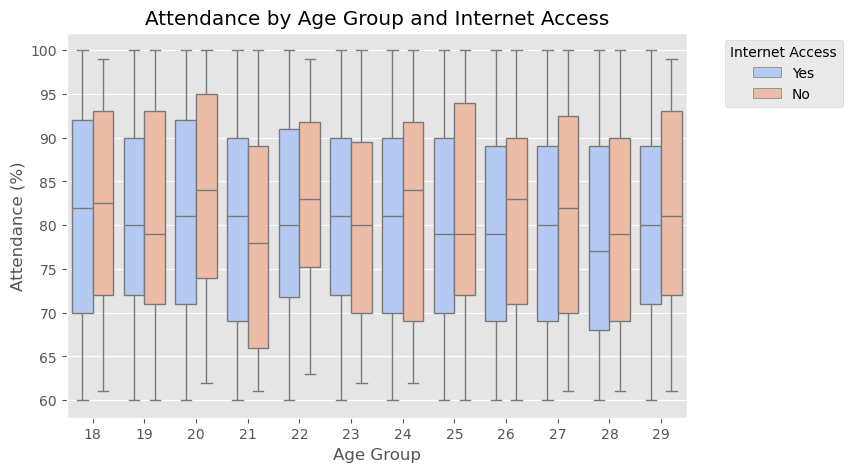

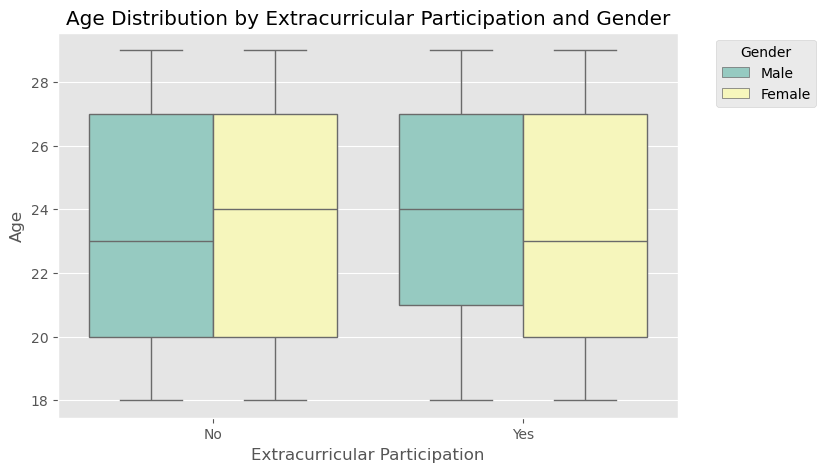

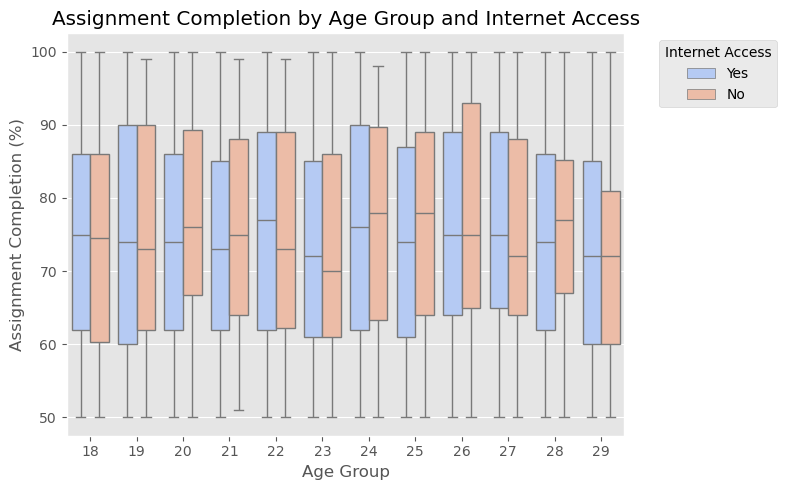

In [23]:
# Multivariate Analysis - Engagement vs Demographics
print("RQ1: Multivariate Analysis - Engagement vs Demographics\n")

import seaborn as sns
import matplotlib.pyplot as plt

# Demographic and engagement variables
demographics = ['age', 'gender', 'internet']
engagement_vars = ['studyhours', 'attendance', 'motivation', 'extracurricular', 'assignmentcompletion']

# Study Hours by Age Group and Gender
plt.figure(figsize=(8,5))
sns.barplot(x='age', y='studyhours', hue='gender', data=df, palette='Set2')
plt.title("Average Study Hours by Age Group and Gender")
plt.xlabel("Age")
plt.ylabel("Mean Study Hours")
plt.legend(title="Gender")
plt.show()

#  Attendance by Age Group and Internet Access
plt.figure(figsize=(8,5))
sns.boxplot(x='age', y='attendance', hue='internet', data=df, palette='coolwarm')
plt.title("Attendance by Age Group and Internet Access")
plt.xlabel("Age Group")
plt.ylabel("Attendance (%)")
plt.legend(title="Internet Access", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Extracurricular Participation by Age and Gender
plt.figure(figsize=(8,5))
sns.boxplot(x='extracurricular', y='age', hue='gender', data=df, palette='Set3')
plt.title("Age Distribution by Extracurricular Participation and Gender")
plt.xlabel("Extracurricular Participation")
plt.ylabel("Age")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Assignment Completion by Age Group and Internet Access
plt.figure(figsize=(8,5))
sns.boxplot(x='age', y='assignmentcompletion', hue='internet', data=df, palette='coolwarm')
plt.title("Assignment Completion by Age Group and Internet Access")
plt.xlabel("Age Group")
plt.ylabel("Assignment Completion (%)")
plt.legend(title="Internet Access", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


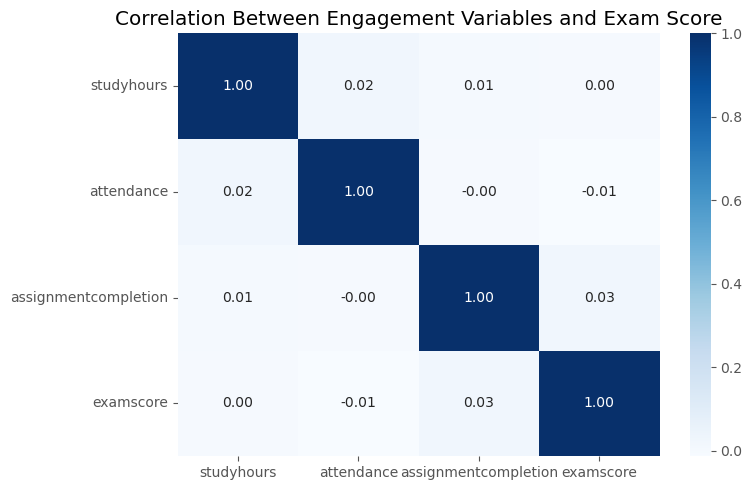

' ============ NOTES ==========\nThe correlation heatmap shows weak correlations among all engagement variables and exam scores, \nsuggesting that no single engagement factor alone strongly predicts academic performance in a linear manner.\nHowever, this does not rule out potential nonlinear or combined effects, which may still influence student outcomes.\n'

In [24]:
# Correlation Heatmap (Numeric Engagement Variables and Exam Score)
plt.figure(figsize=(8,5))
corr = df[['studyhours', 'attendance', 'assignmentcompletion', 'examscore']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Between Engagement Variables and Exam Score")
plt.tight_layout()
plt.show()

""" ============ NOTES ==========
The correlation heatmap shows weak correlations among all engagement variables and exam scores, 
suggesting that no single engagement factor alone strongly predicts academic performance in a linear manner.
However, this does not rule out potential nonlinear or combined effects, which may still influence student outcomes.
"""

finalgrade              Average  Excellent  Fail  Good
stresslevel motivation                                
High        High            287        323   332   335
            Low             451        440   485   468
            Medium          682        673   782   725
Low         High            119         94   155   137
            Low             187        131   211   195
            Medium          297        226   357   283
Medium      High            153        179   184   201
            Low             240        251   266   284
            Medium          382        417   453   405

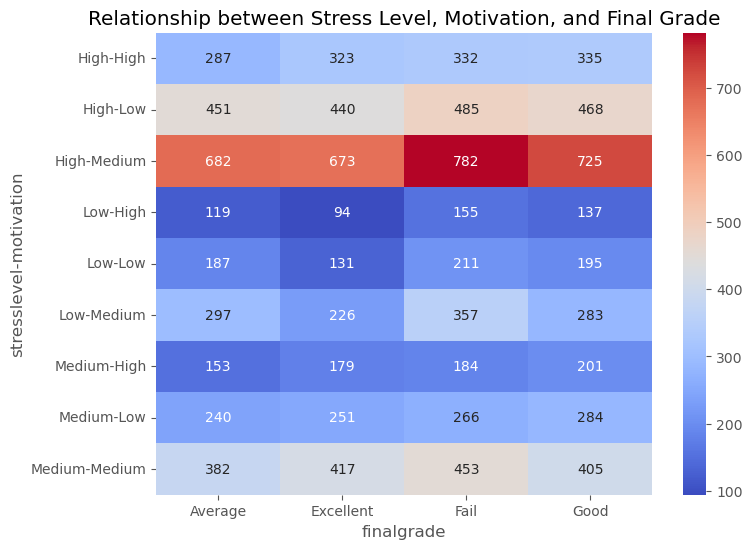

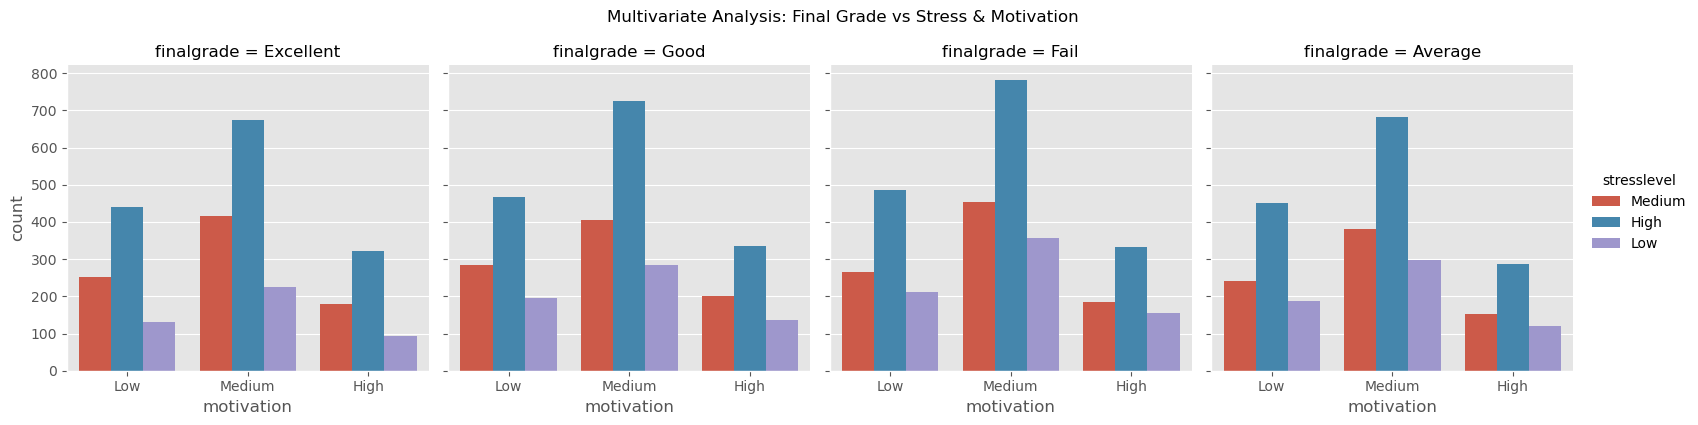

In [25]:
#Multivariate - FinalGrade, Stress Level, Motivation
# Import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Crosstab (3-way frequency table)
table = pd.crosstab([df['stresslevel'], df['motivation']], df['finalgrade'])
display(table)  # for your reference


# 2. Heatmap of Crosstab
plt.figure(figsize=(8,6))
sns.heatmap(table, annot=True, cmap='coolwarm', fmt='d')
plt.title("Relationship between Stress Level, Motivation, and Final Grade")
plt.show()

# 3. Stacked / Clustered Bar Chart 
sns.catplot(x="motivation", hue="stresslevel", col="finalgrade",
            data=df, kind="count", height=4, aspect=1)
plt.suptitle("Multivariate Analysis: Final Grade vs Stress & Motivation", y=1.05)
plt.show()



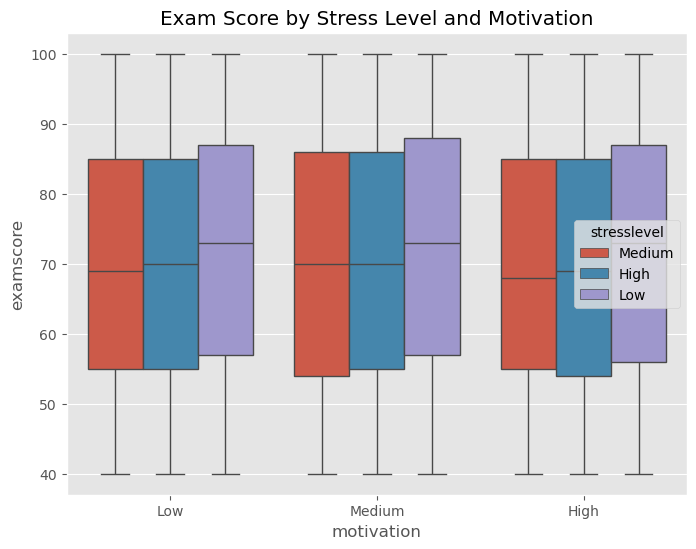

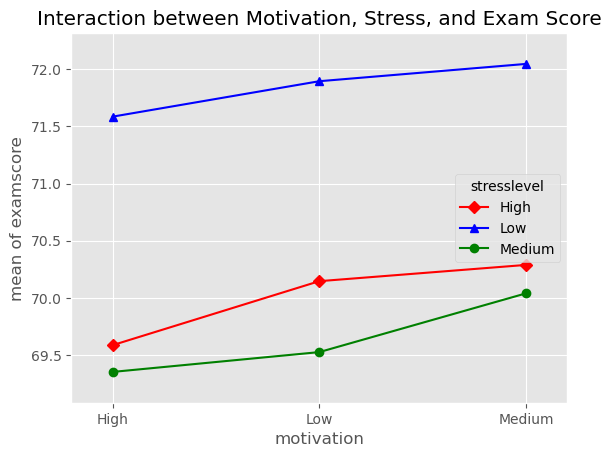

In [27]:
#Multivariate - Exam Score, Stress Level Motivation
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

# 1. Boxplot 
plt.figure(figsize=(8,6))
sns.boxplot(x="motivation", y="examscore", hue="stresslevel", data=df)
plt.title("Exam Score by Stress Level and Motivation")
plt.show()


# 2. Interaction Plot 
fig = interaction_plot(df['motivation'], df['stresslevel'], df['examscore'],
                       colors=['red', 'blue', 'green'], markers=['D', '^', 'o'])
plt.title("Interaction between Motivation, Stress, and Exam Score")
plt.show()

